# Assignment 2: PBL Characteristics and landcover

#### Load necessary packages

In [248]:
#load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import pandas as pd
from pathlib import Path
import scipy.stats
from datetime import datetime
import datetime

In [249]:
from utility import cal_vap_sat, cal_dens_dry, cal_dens_vap, cal_cpa, cal_dens_air, cal_Lob

#### Load data (US-MOz)

In [250]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [251]:
group_number = 2
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-MOz'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataM = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

## LAI

In [252]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

#US-MOz
df_LAIM=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIM.columns=['product']+[i.split(' ')[1] for i in df_LAIM.columns if i!='product']
df_LAIM=df_LAIM.filter(['modis_date','value_mean'])

df_LAIM.set_index(df_LAIM.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIM.drop('modis_date',axis=1,inplace=True)
df_LAIM = df_LAIM.loc['2005 01 01':'2007 12 31']

#### Load data (US-Bo1)

In [255]:
group_number = 6
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-Bo1'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataB = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

## LAI

In [256]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

df_LAIB=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIB.columns=['product']+[i.split(' ')[1] for i in df_LAIB.columns if i!='product']
df_LAIB=df_LAIB.filter(['modis_date','value_mean'])


df_LAIB.set_index(df_LAIB.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIB.drop('modis_date',axis=1,inplace=True)
df_LAIB = df_LAIB.loc['2005 01 01':'2007 12 31']

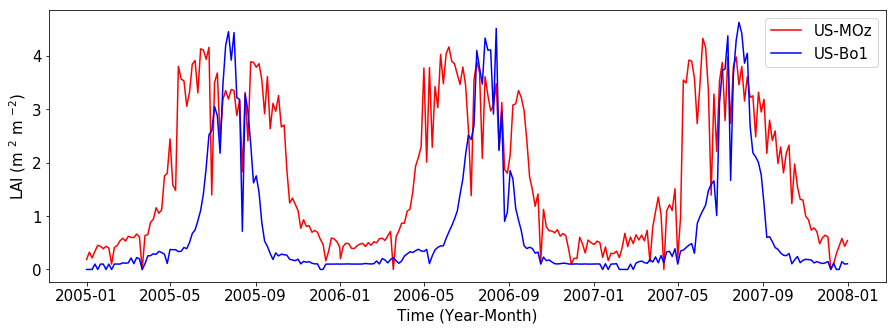

In [216]:
fontsize=15
plt.figure(figsize=(15,5))
plt.plot(df_LAIM, color='red', label='US-MOz')
plt.plot(df_LAIB, color='blue', label='US-Bo1')
plt.legend(loc='best', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('LAI (m $^{2}$ m $^{-2}$)', fontsize=fontsize)
plt.xlabel('Time (Year-Month)', fontsize=fontsize)
plt.savefig('LAI.png', dpi=200)

In [16]:
scipy.stats.ttest_ind(df_LAIM, df_LAIB, equal_var=False)

Ttest_indResult(statistic=array([8.6703995]), pvalue=array([4.98456718e-17]))

### SEB components

#### Look at daytime fluxes only

In [234]:
df_dataM1 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB1 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM1e = df_dataM1[df_dataM1['SWIN']>5]
df_dataB1e = df_dataB1[df_dataB1['SWIN']>5]

Mdata1 = df_dataM1e.loc[:,['NETRAD', 'H','LE']].dropna()
Bdata1 = df_dataB1e.loc[:,['NETRAD', 'H','LE']].dropna()

In [235]:
#US-MOz
Qstar_M = Mdata1.NETRAD
Qh_M = Mdata1.H
Qe_M = Mdata1.LE
Qs_M = Qstar_M - Qh_M - Qe_M

#US-Bo1
Qstar_B = Bdata1.NETRAD
Qh_B = Bdata1.H
Qe_B = Bdata1.LE
Qs_B = Qstar_B - Qh_B - Qe_B

In [236]:
#US-MOz
Qstar_M_day = Qstar_M.groupby(pd.Grouper(freq='D')).mean()
Qh_M_day = Qh_M.groupby(pd.Grouper(freq='D')).mean()
Qe_M_day = Qe_M.groupby(pd.Grouper(freq='D')).mean()
Qs_M_day = Qs_M.groupby(pd.Grouper(freq='D')).mean()
#US-Bo1
Qstar_B_day = Qstar_B.groupby(pd.Grouper(freq='D')).mean()
Qh_B_day = Qh_B.groupby(pd.Grouper(freq='D')).mean()
Qe_B_day = Qe_B.groupby(pd.Grouper(freq='D')).mean()
Qs_B_day = Qs_B.groupby(pd.Grouper(freq='D')).mean()

In [242]:
print (np.nanmean(Qstar_M_day))
print (np.nanmean(Qh_M_day))
print (np.nanmean(Qe_M_day))
print (np.nanmean(Qs_M_day))
print ('')
print (np.nanmean(Qstar_B_day))
print (np.nanmean(Qh_B_day))
print (np.nanmean(Qe_B_day))
print (np.nanmean(Qs_B_day))

245.52504834729754
95.23638199473123
80.99661893954058
69.29204741302574

205.764411476029
59.195078012866055
84.53722155970547
62.03211190345752


In [238]:
print (scipy.stats.ttest_ind(Qstar_M_day.fillna(method='bfill'), Qstar_B_day.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qh_M_day.fillna(method='bfill'), Qh_B_day.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qe_M_day.fillna(method='bfill'), Qe_B_day.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qs_M_day.fillna(method='bfill'), Qs_B_day.fillna(method='bfill'), equal_var=False))

Ttest_indResult(statistic=9.594818356019928, pvalue=2.2369489167631493e-21)
Ttest_indResult(statistic=14.73536799713058, pvalue=7.825441091315189e-47)
Ttest_indResult(statistic=-0.5988186673286604, pvalue=0.5493571635620575)
Ttest_indResult(statistic=5.14702745565599, pvalue=2.9142764845245435e-07)


In [232]:
#US-MOz
Qstar_M_month = Qstar_M.groupby(Qstar_M.index.month).mean()
Qh_M_month = Qh_M.groupby(Qh_M.index.month).mean()
Qe_M_month = Qe_M.groupby(Qe_M.index.month).mean()
Qs_M_month = Qs_M.groupby(Qs_M.index.month).mean()
#US-Bo1
Qstar_B_month = Qstar_B.groupby(Qstar_B.index.month).mean()
Qh_B_month = Qh_B.groupby(Qh_B.index.month).mean()
Qe_B_month = Qe_B.groupby(Qe_B.index.month).mean()
Qs_B_month = Qs_B.groupby(Qs_B.index.month).mean()

In [239]:
print (np.nanmean(Qstar_M_month))
print (np.nanmean(Qh_M_month))
print (np.nanmean(Qe_M_month))
print (np.nanmean(Qs_M_month))
print ('')
print (np.nanmean(Qstar_B_month))
print (np.nanmean(Qh_B_month))
print (np.nanmean(Qe_B_month))
print (np.nanmean(Qs_B_month))

252.88459724516565
101.40184787404338
79.63250936723672
71.85024000388559

207.31527030367897
61.352733776334524
82.71494987057193
63.24758665677254


In [240]:
print (scipy.stats.ttest_ind(Qstar_M_month.fillna(method='bfill'), Qstar_B_month.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qh_M_month.fillna(method='bfill'), Qh_B_month.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qe_M_month.fillna(method='bfill'), Qe_B_month.fillna(method='bfill'), equal_var=False))
print (scipy.stats.ttest_ind(Qs_M_month.fillna(method='bfill'), Qs_B_month.fillna(method='bfill'), equal_var=False))

Ttest_indResult(statistic=1.396372345875383, pvalue=0.17655893782545384)
Ttest_indResult(statistic=3.4794641273663256, pvalue=0.0021336692380878584)
Ttest_indResult(statistic=-0.13639377145996429, pvalue=0.8928095609330142)
Ttest_indResult(statistic=0.85924501889295, pvalue=0.39952290016375647)


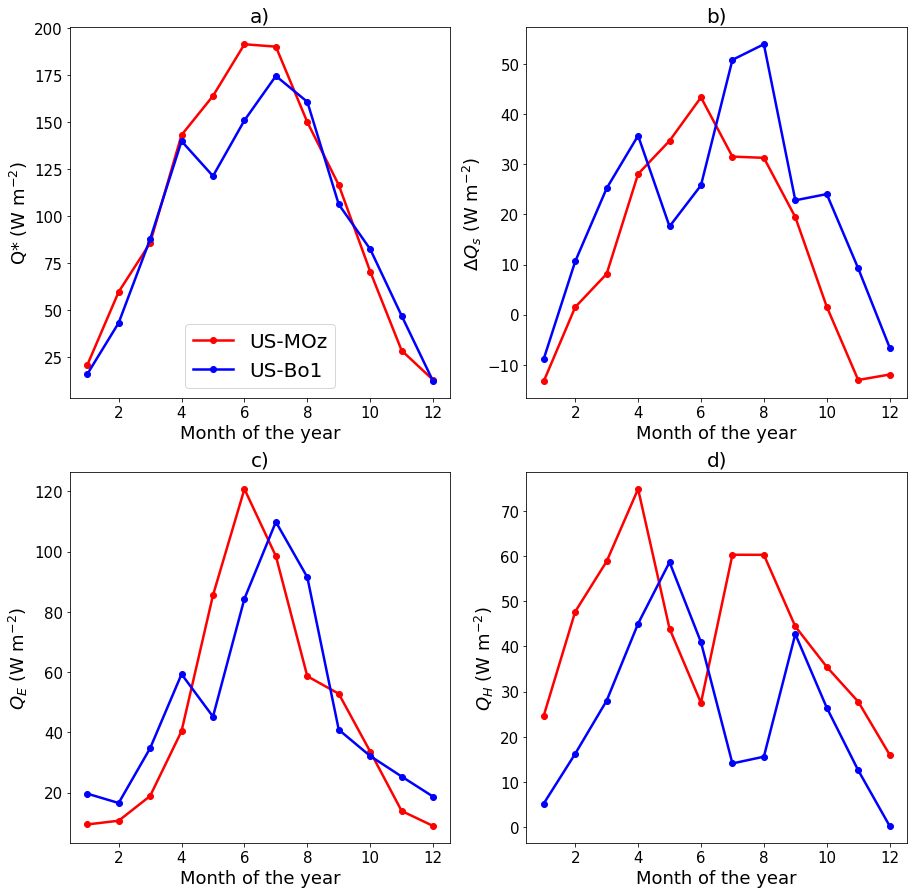

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0,0].plot(Qstar_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,0].plot(Qstar_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
ax[0,0].legend(loc='best', fontsize=20)
ax[0,0].tick_params(labelsize=15)
ax[0,0].set_xlabel('Time (month)', fontsize=18)
ax[0,0].set_ylabel('Q* (W m$^{-2}$)', fontsize=18)
ax[0,0].set_title('a)', fontsize=20)

ax[0,1].plot(Qs_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,1].plot(Qs_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[0,1].legend(loc='best', fontsize=20)
ax[0,1].tick_params(labelsize=15)
ax[0,1].set_xlabel('Time (month)', fontsize=18)
ax[0,1].set_ylabel('$\Delta Q_{s}$ (W m$^{-2}$)', fontsize=18)
ax[0,1].set_title('b)', fontsize=20)

ax[1,0].plot(Qe_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,0].plot(Qe_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,0].legend(loc='best', fontsize=20)
ax[1,0].tick_params(labelsize=15)
ax[1,0].set_xlabel('Time (month)', fontsize=18)
ax[1,0].set_ylabel('$Q_{E}$ (W m$^{-2}$)', fontsize=18)
ax[1,0].set_title('c)', fontsize=20)

ax[1,1].plot(Qh_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,1].plot(Qh_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,1].legend(loc='best', fontsize=20)
ax[1,1].tick_params(labelsize=15)
ax[1,1].set_xlabel('Time (month)', fontsize=18)
ax[1,1].set_ylabel('$Q_{H}$ (W m$^{-2}$)', fontsize=18)
ax[1,1].set_title('d)', fontsize=20)

plt.savefig('SEB_comparison.png', dpi=200)

You need to calculate Obukhov Stability parameter as following:
$$
L=-\frac{u_{*}^{3}}{k \frac{g}{T} \frac{Q_{H}}{\rho c_{p}}}
$$

$$
\text{Obukhov stability parameter }=\frac{z-d}{L}
$$

where $u_*$ is friction velocity; $g$ is gravity; $T$ is air temperature; $k$ is von Kármán’s ‘constant’ (0.4); $Q_H$ is turbulent sensible heat flux; $\rho$ is air density; $z$ is measurement height; and $d$ is zero desplacement height

In [55]:
df_dataM2 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB2 = df_dataB.loc['2005 01 01':'2007 12 31']

Mdata2 = df_dataM2.loc[:,['USTAR', 'TA','H','RH','PA']].dropna()
Bdata2 = df_dataB2.loc[:,['USTAR', 'TA','H','RH','PA']].dropna()

Forest: d = 0.7 x 22m

Cropland: During winter, d = 0. During summer of 2005 and 2007, d = 0.7 x 3m. During summer of 2006, d = 0.7 x 0.9m.

Summer: June - September

In [56]:
#US-MOz
z_meas_M = 30
h_sfc_M = 22
d_M = 0.7*h_sfc_M

In [57]:
#US-Bo1
z_meas_B = 10
h_sfc_B_win = 0
h_sfc_B_corn = 3
h_sfc_B_soya = 0.9
d_B = Bdata2.USTAR.copy()

d_B.loc['2005 01 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2007 10 01':'2007 12 31'] = (0.7 * h_sfc_B_win)

In [58]:
#US-MOz site
Qh_M = Mdata2.H
Ustar_M = Mdata2.USTAR
T_M = Mdata2.TA
RH_M = Mdata2.RH
P_M = Mdata2.PA

Lob_M = cal_Lob(Qh_M, Ustar_M, T_M, RH_M, P_M)

#US-Bo1 site
Qh_B = Bdata2.H
Ustar_B = Bdata2.USTAR
T_B = Bdata2.TA
RH_B = Bdata2.RH
P_B = Bdata2.PA

Lob_B = cal_Lob(Qh_B, Ustar_B, T_B, RH_B, P_B)

In [59]:
#Obukhov stability parameter
OSP_M = (z_meas_M - d_M)/Lob_M
OSP_B = (z_meas_B - d_B)/Lob_B

In [60]:
#US-MOz
OSP_M_unstable = OSP_M[OSP_M < -0.1]
OSP_M_stable = OSP_M[OSP_M > 0.1]
OSP_M_neutral = OSP_M[(OSP_M > -0.1) & (OSP_M < 0.1)]

#US-Bo1
OSP_B_unstable = OSP_B[OSP_B < -0.1]
OSP_B_stable = OSP_B[OSP_B > 0.1]
OSP_B_neutral = OSP_B[(OSP_B > -0.1) & (OSP_B < 0.1)]

In [61]:
#US-MOz site
Total_M = len(OSP_M)
Unstable_M = len(OSP_M_unstable)
Stable_M = len(OSP_M_stable)
Neutral_M = len(OSP_M_neutral)

#US-Bo1 site
Total_B = len(OSP_B)
Unstable_B = len(OSP_B_unstable)
Stable_B = len(OSP_B_stable)
Neutral_B = len(OSP_B_neutral)

In [62]:
print (Unstable_M/Total_M)
print (Stable_M/Total_M)
print (Neutral_M/Total_M)
print ('')
print (Unstable_B/Total_B)
print (Stable_B/Total_B)
print (Neutral_B/Total_B)

0.4115279205207263
0.5017343268242549
0.08673775265501885

0.400346576285008
0.5100022935195332
0.08965113019545883


### Determine albedo

$$
{\alpha}=\frac{SW_{out}}{SW_{in}} 
$$

where $SW_{out}$ is the outgoing shortwave radiation (W m$^{-2}$), and $SW_{in}$ is the incoming shortwave radiation (W m$^{-2}$).

In [63]:
df_dataM3 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB3 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM3 = df_dataM3.between_time('09:00','15:00')
df_dataB3 = df_dataB3.between_time('09:00','15:00')

Mdata3 = df_dataM3.loc[:,['SWIN','SWOUT']].dropna()
Bdata3 = df_dataB3.loc[:,['SWIN','SWOUT']].dropna()

In [64]:
# Albedo
alb_M = Mdata3.SWOUT/Mdata3.SWIN
alb_B = Bdata3.SWOUT/Bdata3.SWIN

alb_M_month = alb_M.groupby(alb_M.index.month).mean()
alb_B_month = alb_B.groupby(alb_B.index.month).mean()

In [65]:
alb_M_day = alb_M.groupby(pd.Grouper(freq='D')).mean()
alb_B_day = alb_B.groupby(pd.Grouper(freq='D')).mean()

In [66]:
scipy.stats.ttest_ind(alb_M_day.fillna(method='bfill'), alb_B_day.fillna(method='bfill'), equal_var=False)

Ttest_indResult(statistic=-24.383074648530403, pvalue=2.418958085357407e-106)

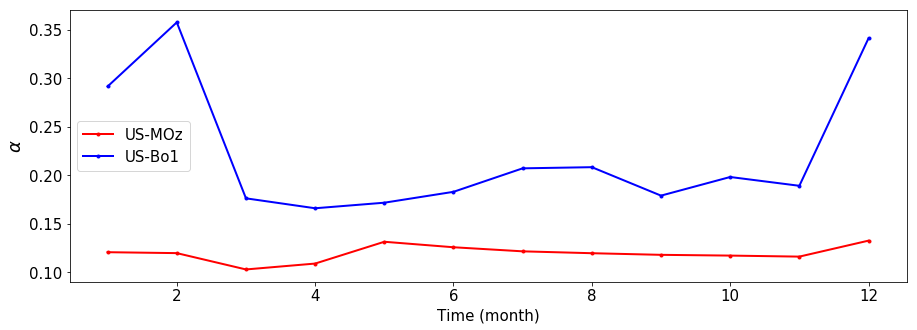

In [68]:
plt.figure(figsize=(15,5))
plt.plot(alb_M_month, color='red', marker='o', markersize=3, label='US-MOz', linewidth=2)
plt.plot(alb_B_month, color='blue', marker='o', markersize=3, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=18)
plt.savefig('Albedo.png', dpi=200)

### Roughness length

z0 = (z-d)exp(-ku/u*)

In [162]:
df_dataM4 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB4 = df_dataB.loc['2005 01 01':'2007 12 31']

Mdata4 = df_dataM4.loc[:,['WS','USTAR','TA','H','RH','PA']].dropna()
Bdata4 = df_dataB4.loc[:,['WS','USTAR','TA','H','RH','PA']].dropna()

Mdata4e = Mdata4[Mdata4.WS!=0].dropna()
Bdata4e = Bdata4[Bdata4.WS!=0].dropna()

In [163]:
#Redefine zero plane displacement height
d_B = Bdata4e.USTAR.copy()

d_B.loc['2005 01 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2007 10 01':'2007 12 31'] = (0.7 * h_sfc_B_win)

In [164]:
#US-MOz site
Qh_M = Mdata4e.H
Ustar_M = Mdata4e.USTAR
T_M = Mdata4e.TA
RH_M = Mdata4e.RH
P_M = Mdata4e.PA

Lob_M = cal_Lob(Qh_M, Ustar_M, T_M, RH_M, P_M)

#Obukhov stability parameter
OSP_M = (z_meas_M - d_M)/Lob_M

#US-Bo1 site
Qh_B = Bdata4e.H
Ustar_B = Bdata4e.USTAR
T_B = Bdata4e.TA
RH_B = Bdata4e.RH
P_B = Bdata4e.PA

Lob_B = cal_Lob(Qh_B, Ustar_B, T_B, RH_B, P_B)

#Obukhov stability parameter
OSP_B = (z_meas_B - d_B)/Lob_B

In [207]:
#Stability correction factor
#if OSP < 0.1 and OSP > -0.1, phi_m = 0
#if OSP >0.1, phi_m = (1 - 19.3OSP)^-1/4
#if OSP < 0.1, phi_m = 1 + 6OSP
phi_m_M = OSP_M.copy()
for i in range(len(OSP_M)):
    if OSP_M[i] <= 0.1 and OSP_M[i] >= -0.1:
        phi_m_M[i] = 0
    if OSP_M[i] > 0.1:
        phi_m_M[i] = ((1 - 19.3*OSP_M[i])**(-0.25))
    if OSP_M[i] < -0.1:
        phi_m_M[i] = (1 + 6*OSP_M[i])

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [205]:
print (OSP_M)

time
2005-01-10 10:00:00   -0.082329
2005-01-10 10:30:00   -0.082280
2005-01-10 11:00:00   -0.127331
2005-01-10 11:30:00   -0.054373
2005-01-10 12:00:00   -0.073817
2005-01-10 12:30:00   -0.068972
2005-01-10 13:00:00   -0.140600
2005-01-10 13:30:00   -0.110812
2005-01-10 14:00:00   -0.205690
2005-01-10 14:30:00   -0.099344
2005-01-10 15:00:00   -0.014801
2005-01-10 15:30:00    0.234357
2005-01-10 16:00:00    0.081811
2005-01-10 16:30:00    0.110112
2005-01-10 17:00:00    0.160193
2005-01-10 17:30:00    0.203867
2005-01-10 18:00:00    0.113659
2005-01-10 18:30:00    0.163713
2005-01-10 19:00:00    0.192525
2005-01-10 19:30:00    0.302872
2005-01-10 20:00:00    0.346813
2005-01-10 20:30:00    0.228562
2005-01-10 21:00:00    0.369263
2005-01-10 21:30:00    0.268626
2005-01-10 22:00:00    0.560358
2005-01-10 22:30:00    0.878767
2005-01-10 23:00:00    2.089505
2005-01-10 23:30:00    1.802896
2005-01-11 00:00:00    1.564375
2005-01-11 00:30:00    0.981644
                         ...   
200

In [208]:
print (phi_m_M)

time
2005-01-10 10:00:00     0.000000
2005-01-10 10:30:00     0.000000
2005-01-10 11:00:00     0.236014
2005-01-10 11:30:00     0.000000
2005-01-10 12:00:00     0.000000
2005-01-10 12:30:00     0.000000
2005-01-10 13:00:00     0.156402
2005-01-10 13:30:00     0.335131
2005-01-10 14:00:00    -0.234142
2005-01-10 14:30:00     0.000000
2005-01-10 15:00:00     0.000000
2005-01-10 15:30:00          NaN
2005-01-10 16:00:00     0.000000
2005-01-10 16:30:00          NaN
2005-01-10 17:00:00          NaN
2005-01-10 17:30:00          NaN
2005-01-10 18:00:00          NaN
2005-01-10 18:30:00          NaN
2005-01-10 19:00:00          NaN
2005-01-10 19:30:00          NaN
2005-01-10 20:00:00          NaN
2005-01-10 20:30:00          NaN
2005-01-10 21:00:00          NaN
2005-01-10 21:30:00          NaN
2005-01-10 22:00:00          NaN
2005-01-10 22:30:00          NaN
2005-01-10 23:00:00          NaN
2005-01-10 23:30:00          NaN
2005-01-11 00:00:00          NaN
2005-01-11 00:30:00          NaN
     

In [151]:
z0_M = (z_meas_M - d_M)/np.exp((0.4*Mdata4e.WS)/Mdata4e.USTAR)
z0_B = (z_meas_B - d_B)/np.exp((0.4*Bdata4e.WS)/Bdata4e.USTAR)

In [152]:
print (np.nanmedian(z0_M))
print (np.nanmedian(z0_B))

0.7407641439263215
0.02669702509888769


In [153]:
#Import curve fit (for log law wind profile)
from scipy.optimize import curve_fit

In [154]:
#Calculate wind speed for US-MOz
def func_uzM(ustar, z0):
    z = z_meas_M
    d = d_M
    k = 0.4
    uzM = (ustar/k)*np.log((z-d)/z0)
    return uzM

ustar_M = Mdata4e.USTAR
ws_M = Mdata4e.WS
# use curve_fit to get parameters of interest
z0_fitM, _ = curve_fit(func_uzM, ustar_M, ws_M, bounds=[(0), (np.inf)])

In [155]:
#Calculate wind speed for US-MOz
def func_uzB(ustar, z0):
    z = z_meas_B
    d = d_B
    k = 0.4
    uzB = (ustar/k)*np.log((z-d)/z0)
    return uzB

ustar_B = Bdata4e.USTAR
ws_B = Bdata4e.WS
# use curve_fit to get parameters of interest
z0_fitB, _ = curve_fit(func_uzB, ustar_B, ws_B, bounds=[(0), (np.inf)])

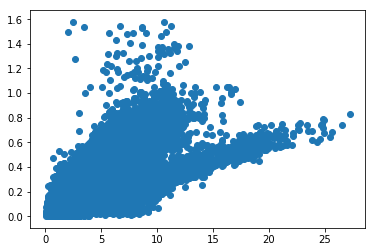

In [160]:
plt.scatter(ws_B, ustar_B)

In [156]:
print (z0_fitM)
print (z0_fitB)

[1.17095796]
[0.04405466]


### Select years to analyse

In [8]:
#Years to analyse
#Summer
df_dataM2005s = df_dataM.loc['2005 06 01':'2005 08 31']
df_dataM2006s = df_dataM.loc['2006 06 01':'2006 08 31']
df_dataM2007s = df_dataM.loc['2007 06 01':'2007 08 31']
df_Ms = pd.concat([df_dataM2005s, df_dataM2006s, df_dataM2007s], axis=0)
df_dataB2005s = df_dataB.loc['2005 06 01':'2005 08 31']
df_dataB2006s = df_dataB.loc['2006 06 01':'2006 08 31']
df_dataB2007s = df_dataB.loc['2007 06 01':'2007 08 31']
df_Bs = pd.concat([df_dataB2005s, df_dataB2006s, df_dataB2007s], axis=0)

#Winter
df_dataM2005w = df_dataM.loc['2004 12 01':'2005 02 28']
df_dataM2006w = df_dataM.loc['2005 12 01':'2006 02 28']
df_dataM2007w = df_dataM.loc['2006 12 01':'2007 02 28']
df_Mw = pd.concat([df_dataM2005w, df_dataM2006w, df_dataM2007w], axis=0)
df_dataB2005w = df_dataB.loc['2004 12 01':'2005 02 28']
df_dataB2006w = df_dataB.loc['2005 12 01':'2006 02 28']
df_dataB2007w = df_dataB.loc['2006 12 01':'2007 02 28']
df_Bw = pd.concat([df_dataB2005w, df_dataB2006w, df_dataB2007w], axis=0)

In [9]:
#Daytime
df_Msd = df_Ms[df_Ms['SWIN'] > 5]
df_Bsd = df_Bs[df_Bs['SWIN'] > 5]

df_Mwd = df_Mw[df_Mw['SWIN'] > 5]
df_Bwd = df_Bw[df_Bw['SWIN'] > 5]

#### Select variables

In [10]:
Msdata = df_Msd.loc[:,['SWIN','LWIN','SWOUT','LWOUT','NETRAD', 'H','LE','USTAR','TA','RH','PA','WS','WD']].dropna()
Bsdata = df_Bsd.loc[:,['SWIN','LWIN','SWOUT','LWOUT','NETRAD', 'H','LE','USTAR','TA','RH','PA','WS','WD']].dropna()

Mwdata = df_Mwd.loc[:,['SWIN','LWIN','SWOUT','LWOUT','NETRAD', 'H','LE','USTAR','TA','RH','PA','WS','WD']].dropna()
Bwdata = df_Bwd.loc[:,['SWIN','LWIN','SWOUT','LWOUT','NETRAD', 'H','LE','USTAR','TA','RH','PA','WS','WD']].dropna()

### Determine albedo

$$
{\alpha}=\frac{SW_{out}}{SW_{in}} 
$$

where $SW_{out}$ is the outgoing shortwave radiation (W m$^{-2}$), and $SW_{in}$ is the incoming shortwave radiation (W m$^{-2}$).

In [87]:
#Find average albedos using radiation data
#Summer
SWIN_M_sum = Msdata.SWIN
SWOUT_M_sum = Msdata.SWOUT
alb_M_sum = SWOUT_M_sum/SWIN_M_sum

SWIN_B_sum = Bsdata.SWIN
SWOUT_B_sum = Bsdata.SWOUT
alb_B_sum = SWOUT_B_sum/SWIN_B_sum

#Winter
SWIN_M_win = Mwdata.SWIN
SWOUT_M_win = Mwdata.SWOUT
alb_M_win = SWOUT_M_win/SWIN_M_win

SWIN_B_win = Bwdata.SWIN
SWOUT_B_win = Bwdata.SWOUT
alb_B_win = SWOUT_B_win/SWIN_B_win

In [109]:
print (np.nanmean(SWIN_M_sum))
print (np.nanmean(SWIN_B_sum))
print ('')
print (np.nanmean(SWIN_M_win))
print (np.nanmean(SWIN_B_win))

467.0191637630662
423.3428828558572

260.85349957495043
223.99429016350896


In [94]:
print (np.nanmean(alb_M_sum))
print (np.nanmean(alb_M_win))
print (np.nanmean(alb_B_sum))
print (np.nanmean(alb_B_win))
print ('')
print (np.nanmedian(alb_M_sum))
print (np.nanmedian(alb_M_win))
print (np.nanmedian(alb_B_sum))
print (np.nanmedian(alb_B_win))

0.16105980410124066
0.1433182888364596
0.23798322876167788
0.33015122339238556

0.13180867249904907
0.11885245901639344
0.21624713958810068
0.21300448430493274


In [95]:
#Midday values
data1 = alb_M_sum.between_time('10:00','14:00')
data2 = alb_M_win.between_time('10:00','14:00')
data3 = alb_B_sum.between_time('10:00','14:00')
data4 = alb_B_win.between_time('10:00','14:00')

print (np.nanmean(data1))
print (np.nanmean(data2))
print (np.nanmean(data3))
print (np.nanmean(data4))
print ('')
print (np.nanmedian(data1))
print (np.nanmedian(data2))
print (np.nanmedian(data3))
print (np.nanmedian(data4))

0.12048291605850203
0.11536173472062539
0.1965460412673385
0.30614287900522835

0.11904761904761904
0.11073825503355705
0.19247595687716662
0.19101243015628797


## OHM model

In [110]:
#Summer
#US-MOz site
QSTAR_Ms = Msdata.NETRAD
QH_Ms = Msdata.H
QE_Ms = Msdata.LE

QS_Ms = QSTAR_Ms - QH_Ms - QE_Ms

#US-Bo1 site
QSTAR_Bs = Bsdata.NETRAD
QH_Bs = Bsdata.H
QE_Bs = Bsdata.LE

QS_Bs = QSTAR_Bs - QH_Bs - QE_Bs

#Winter
#US-MOz site
QSTAR_Mw = Mwdata.NETRAD
QH_Mw = Mwdata.H
QE_Mw = Mwdata.LE

QS_Mw = QSTAR_Mw - QH_Mw - QE_Mw

#US-Bo1 site
QSTAR_Bw = Bwdata.NETRAD
QH_Bw = Bwdata.H
QE_Bw = Bwdata.LE

QS_Bw = QSTAR_Bw - QH_Bw - QE_Bw

In [107]:
print (np.nanmean(QSTAR_Ms))
print (np.nanmean(QSTAR_Bs))

342.3796457607433
293.2318884055797


In [103]:
from scipy.stats import linregress

In [112]:
Ms_a1 = linregress(QSTAR_Ms, QS_Ms).slope
Mw_a1 = linregress(QSTAR_Mw, QS_Mw).slope

Bs_a1 = linregress(QSTAR_Bs, QS_Bs).slope
Bw_a1 = linregress(QSTAR_Bw, QS_Bw).slope

print (Ms_a1)
print (Mw_a1)
print (Bs_a1)
print (Bw_a1)

0.30434294614431384
0.40703210440144616
0.3270355733198157
0.464731873797772


In [ ]:
#Surface resistance

In [ ]:
#Stability analysis using Obukhov length
#Determine fraction of stable, unstable and neutral conditions at each site

In [ ]:
#Partitioning of the surface energy balance components